### Case Study 4 :  Data Science Shark Tank

***Due Date: December 8, before 6pm***

Note: 
    
***part_1 and part_3 of Problem_1, and links to datasets (or API you are planning to use) should be sent to me by email (tghoshal@wpi.edu) before 5:59pm on Nov 18. You must CC all your group members in that email. Without this step, your project may not be approved for presentation on Dec 9.***

also NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!
 
 ![Bilby Stampede](https://upload.wikimedia.org/wikipedia/en/6/68/Shark_Tank_Logo.jpg)

### Introduction

After the previous 3 case studies,  your are now equipped with three powerful skills of an effective data scientist: ***data gathering, model development, exploratory data analysis***. In this case study, your team is going to act like a data science team in a mid-size company. Your team will make use of these skills to come up with an idea for a new data science project, covince senior executives of the idea to get funding/ financial resources using data driven presentations, and finally build a prototype model for use by another team within the company. 

Your team needs to decide which business problem is important for the market your company is in (for example, social media market, housing market, search market, etc.). Then use data science approaches to gather data, explore the data, tie with business needs, make conjectures, develop models etc.

The solution should include some key components of data science: 

    1) the business part to analyze the potential impact of your new/improved service, why the idea can make money, how are you planning to persuade senior executives (e.g. seniors VPS/ CEO/ COO) to allocate money for your project
    
    2) collect data, perform exploratory data analysis, make conjectures in support of the business plan made in the previous step
    
    3) Use one of your conjectures from step 2 as the motivation for developing a model. Use appropriate features from your data and build the model.

NOTE, as opposed to the first three case studies, case study 4 is much much more open ended. A more complex model does not mean a better project. Also, strong exploratory data analysis loosely tied with the business question also does not mean a better project. Try to make all parts coherent so that they collectively tell one story.

# Background (Elevator Pitch)

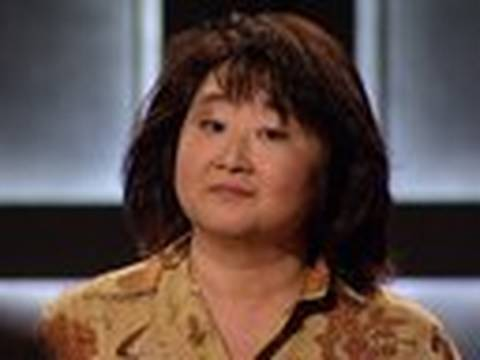

In [1]:
# Should your project be like this?

from IPython.display import YouTubeVideo
YouTubeVideo("3UuFR4Y4uw8") 

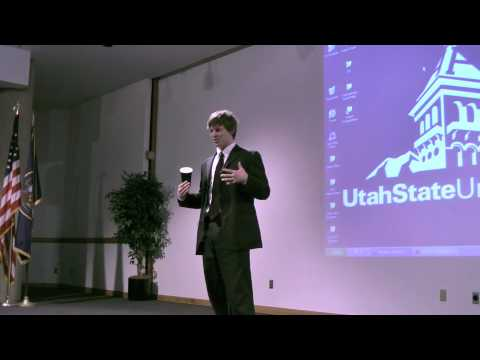

In [2]:
# Or should your project be like this?

YouTubeVideo("i6O98o2FRHw") 

## Some Resources

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings:** 


** APIs **
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition

** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/datasets/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, www.data.gov.fr, http://opengovernmentdata.org/data/catalogues/   




### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on. Pick one of the markets for further consideration, and propose a new data science project which you believe will be important for your company to do well in the market. Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe your team can make use of data science methodologies to solve the problem?
How are you planing to persuade the senior executives to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:

2) Why the problem is important to solve? 
Companies tend to spend a lot of money on advertising through campaign. This can be a waste when certain demographics tend to buy the product without multiple campaigns. Developing a model that will determine the number of campaigns necessary to sell a product to certain demographics will significantly decrease the amount of money spent on advertising per year.

3) What is your idea to solve the problem? 
There are 6 columns in our dataset that explain a customer’s behavior to a campaign. We plan to explore which factors contribute to how quickly the customers will accept the campaign. This will help the marketing team to decide how many campaign to send to certain demographics. For example, if middle-age women with children in a household tend to accept the first campaign offer, then the marketing team doesn’t have to continue to spend money on the marketing campaign for that demographic. 

4) What differences you could make with your data science approach?


5) Why do you believe the idea deserves the financial resources of your company?






### Problem 2: Data Gathering, Exploratory Data Analysis, Make Conjectures (20 points)

Gather data in support of your responses for Problem 1. Use appropriate data analysis techniques to explore the data. Make conejectures in relation to problem 1. Find support for your conjectures using the data.

**Insert your answers in the cell below** 

**Add as many cells as needed**


If you are using an API to collect data, provide the code below.

If you collecting data from publicly available datasets, provide the links to them below.

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [29]:
# Feature Engineering:
# For our target variable, we chose to combine the promotion columns into one feature in which
# 0 represents if the customer did not accept the promotion, 1-6 represents if the customer did 
# accept the promotion on the respective campaign.

marketing_data = pd.read_csv("marketing_campaign.csv", delimiter="\t")

campaign_accepted = np.repeat(0, len(marketing_data))

for i in range(1,6):
    column_name = "AcceptedCmp" + str(i)
    campaign_accepted[marketing_data[column_name] == 1] = i
campaign_accepted[marketing_data["Response"] == 1] = 6

marketing_data.drop(columns=["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], inplace=True)
marketing_data["CampaignAccepted"] = campaign_accepted

enroll_year = []
for i in marketing_data['Dt_Customer']:
    enroll_year.append(int(i[-4:]))
marketing_data["Enroll_Year"] = enroll_year
marketing_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,CampaignAccepted,Enroll_Year
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,3,8,10,4,7,0,3,11,6,2012
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,1,2,5,0,3,11,0,2014
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,1,8,2,10,4,0,3,11,0,2013
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,2,2,0,4,6,0,3,11,0,2014
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,5,3,6,5,0,3,11,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,2,9,3,4,5,0,3,11,0,2013
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,8,2,5,7,0,3,11,1,2014
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,2,3,13,6,0,3,11,4,2014
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,2,6,5,10,3,0,3,11,0,2014


In [4]:
marketing_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,CampaignAccepted
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375,3.0,11.0,1.329911
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391,0.0,0.0,2.311514
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,3.0,11.0,3.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,3.0,11.0,6.000000


Text(0.5, 1.0, 'nth Campaign Accepted Distribution')

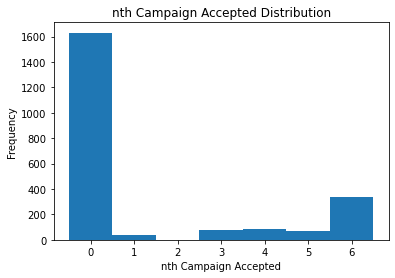

In [4]:
#campaign accepted distribution
plt.hist(x=marketing_data['CampaignAccepted'], bins=7, range=[-0.5,6.5])
plt.xlabel('nth Campaign Accepted')
plt.ylabel("Frequency")
plt.title("nth Campaign Accepted Distribution")

In [ ]:
Surprised that most people don't accept any campaign. It makes sense the 6th campaign is more effective than others since
the company is able to detect the customers' needs and customize the campaign accordingly.

Conjecture: the product doesn't meet the majority of customers' need or they spend the promotion on the wrong group of people

Text(0.5, 1.0, 'Income Distribution For Income < $100,000')

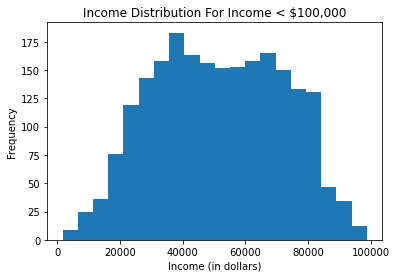

In [41]:
#income distribution from <100000
income_dist_under_100K = pysqldf("SELECT * FROM marketing_data WHERE Income < 100000")

plt.hist(x=income_dist_under_100K['Income'], bins='auto')
plt.xlabel('Income (in dollars)')
plt.ylabel("Frequency")
plt.title("Income Distribution For Income < $100,000")

In [28]:
#Accepted promotions by income group
Poor = pysqldf("SELECT * FROM marketing_data WHERE Income < 32000")['CampaignAccepted'].values
Lower_middle = pysqldf("SELECT * FROM marketing_data WHERE Income < 53400 AND Income > 32000")['CampaignAccepted'].values
Middle = pysqldf("SELECT * FROM marketing_data WHERE Income < 106800 AND Income > 53400")['CampaignAccepted'].values
Upper_middle = pysqldf("SELECT * FROM marketing_data WHERE Income < 373900 AND Income > 106800")['CampaignAccepted'].values
Rich = pysqldf("SELECT * FROM marketing_data WHERE Income > 373900")['CampaignAccepted'].values

n=300

accepted_promo_by_income = [] #list
accepted_promo_by_income.append(random.sample(list(Poor),n))
accepted_promo_by_income.append(random.sample(list(Lower_middle),n))
accepted_promo_by_income.append(random.sample(list(Middle),n))
accepted_promo_by_income.append(list(Upper_middle))
accepted_promo_by_income.append(list(Rich))

Text(0.5, 1.0, 'Accepted promotions by income group')

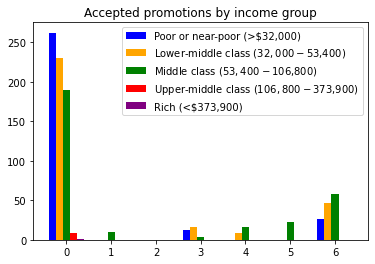

In [29]:
fig,ax = plt.subplots()
labels = ['Poor or near-poor (>$32,000)', 'Lower-middle class ($32,000-$53,400)', 'Middle class ($53,400-$106,800)','Upper-middle class ($106,800-$373,900)', 'Rich (<$373,900)']
colors = ['blue','orange','green','red','purple']
ax.hist(accepted_promo_by_income, bins=7 , range=[-0.5,6.5], histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 10})
ax.set_title("Accepted promotions by income group")

Poor or near-poor spend less than other income classes. Upper-middle class and Rich tend to be picky and don't accept any promotions. Poor or near-poor, Lower-middle and Middle class tend to wait till the last promotion

Conjecture: The products meet the needs of more poor to middle class than upper-middle and rich class

Products featured in data are wine, fruits, meat, fish, sweets, gold.

Prediction: Uppder-middle and rich will more likely to accept wine and gold promotion. Household with kides will more likely to accept sweets

Text(0.5, 1.0, 'Relationship between wine spending and income class')

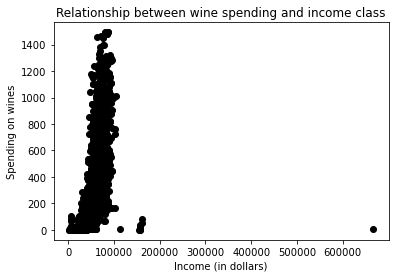

In [42]:
# Scatter plot for spending of wines in relation with income class
plt.plot(marketing_data['Income'], marketing_data['MntWines'],'o', color="Black")
plt.xlabel('Income (in dollars)')
plt.ylabel("Spending on wines")
plt.title("Relationship between wine spending and income class")

In [40]:
def create_scatter_plot(title, prod_name, product, income_class):
    plt.scatter(income_class, product)
    plt.title(title)
    plt.xlabel("Income (in dollars)")
    plt.ylabel(prod_name)

In [43]:
def calculate_correlation(product, income_class):
    data = {'Product': product, 'Income': income_class}
    product_and_income = pd.DataFrame(data)
    corr = product_and_income.corr()
    corr = pd.melt(corr.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    return corr.value[1]

Correlation: 
0.733900829256723


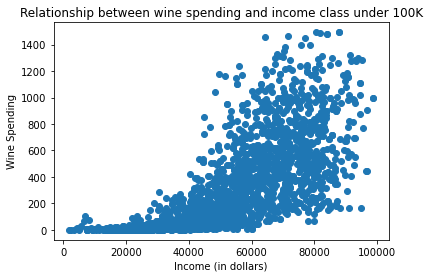

In [44]:
# Scatter plot for spending of wines in relation with income class
product = income_dist_under_100K['MntWines'].values
create_scatter_plot("Relationship between wine spending and income class under 100K", "Wine Spending", product, income_dist_under_100K['Income'].values)
print("Correlation: ")
print(calculate_correlation(product,income_dist_under_100K['Income'].values))

Correlation: 
0.5383932714643384


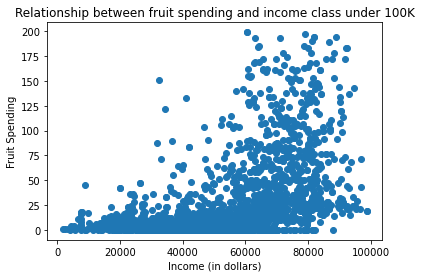

In [45]:
# Scatter plot for spending of fruits in relation with income class
product = income_dist_under_100K['MntFruits'].values
create_scatter_plot("Relationship between fruit spending and income class under 100K", "Fruit Spending", product,income_dist_under_100K['Income'].values)
print("Correlation: ")
print(calculate_correlation(product,income_dist_under_100K['Income'].values))

Correlation: 
0.7088785721897024


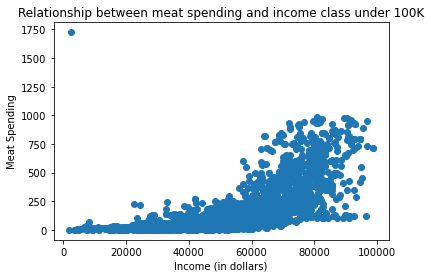

In [46]:
# Scatter plot for spending of meat in relation with income class
product = income_dist_under_100K['MntMeatProducts'].values
create_scatter_plot("Relationship between meat spending and income class under 100K", "Meat Spending", product,income_dist_under_100K['Income'].values)
print("Correlation: ")
print(calculate_correlation(product,income_dist_under_100K['Income'].values))

Correlation: 
0.5541242702641593


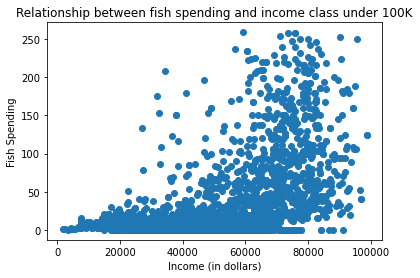

In [47]:
# Scatter plot for spending of fish in relation with income class
product = income_dist_under_100K['MntFishProducts'].values
create_scatter_plot("Relationship between fish spending and income class under 100K", "Fish Spending", product,income_dist_under_100K['Income'].values)
print("Correlation: ")
print(calculate_correlation(product,income_dist_under_100K['Income'].values))

Correlation: 
0.5505815093784631


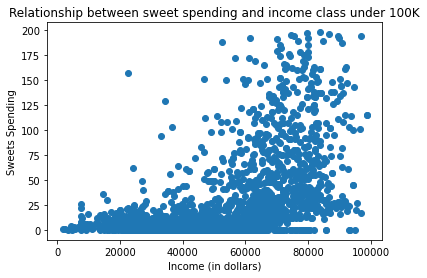

In [48]:
# Scatter plot for spending of sweets in relation with income class
product = income_dist_under_100K['MntSweetProducts'].values
create_scatter_plot("Relationship between sweet spending and income class under 100K", "Sweets Spending", product,income_dist_under_100K['Income'].values)
print("Correlation: ")
print(calculate_correlation(product,income_dist_under_100K['Income'].values))

Correlation: 
0.41582717001423714


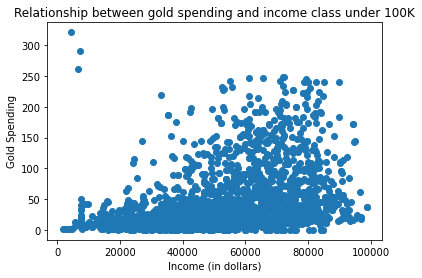

In [49]:
# Scatter plot for spending of gold in relation with income class
product = income_dist_under_100K['MntGoldProds'].values
create_scatter_plot("Relationship between gold spending and income class under 100K", "Gold Spending", product,income_dist_under_100K['Income'].values)
print("Correlation: ")
print(calculate_correlation(product,income_dist_under_100K['Income'].values))

Doesn't seem like there is a clear trend between gold spending and income class. Meanwhile, there is a clearer linear relationship between meat and wine spending and income class

Conjecture: Focus our promotion for meat and wine on upper class can potentially generate more profit.

In [20]:
# meat, income, promotion accepted
Poor = pysqldf("SELECT MntMeatProducts, CampaignAccepted FROM marketing_data WHERE Income < 32000")['CampaignAccepted'].values
Lower_middle = pysqldf("SELECT MntMeatProducts, CampaignAccepted FROM marketing_data WHERE Income < 53400 AND Income > 32000")['CampaignAccepted'].values
Middle = pysqldf("SELECT MntMeatProducts, CampaignAccepted FROM marketing_data WHERE Income < 106800 AND Income > 53400")['CampaignAccepted'].values
Upper_middle = pysqldf("SELECT MntMeatProducts, CampaignAccepted FROM marketing_data WHERE Income < 373900 AND Income > 106800")['CampaignAccepted'].values
Rich = pysqldf("SELECT MntMeatProducts, CampaignAccepted FROM marketing_data WHERE Income > 373900")['CampaignAccepted'].values

n=300 #random sample

accepted_promo_by_income = [] #list
accepted_promo_by_income.append(random.sample(list(Poor),n))
accepted_promo_by_income.append(random.sample(list(Lower_middle),n))
accepted_promo_by_income.append(random.sample(list(Middle),n))
accepted_promo_by_income.append(list(Upper_middle))
accepted_promo_by_income.append(list(Rich))

Text(0.5, 1.0, 'Accepted promotions for meat by income group')

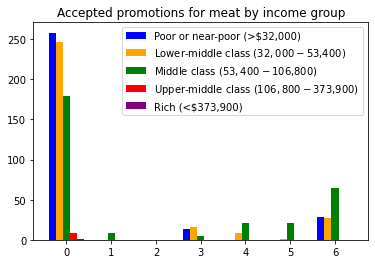

In [21]:
fig,ax = plt.subplots()
labels = ['Poor or near-poor (>$32,000)', 'Lower-middle class ($32,000-$53,400)', 'Middle class ($53,400-$106,800)','Upper-middle class ($106,800-$373,900)', 'Rich (<$373,900)']
colors = ['blue','orange','green','red','purple']
ax.hist(accepted_promo_by_income, bins=7 , range=[-0.5,6.5], histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 10})
ax.set_title("Accepted promotions for meat by income group")

In [59]:
# meat, income, promotion accepted
Poor = pysqldf("SELECT MntWines, CampaignAccepted FROM marketing_data WHERE Income < 32000")['CampaignAccepted'].values
Lower_middle = pysqldf("SELECT MntWines, CampaignAccepted FROM marketing_data WHERE Income < 53400 AND Income > 32000")['CampaignAccepted'].values
Middle = pysqldf("SELECT MntWines, CampaignAccepted FROM marketing_data WHERE Income < 106800 AND Income > 53400")['CampaignAccepted'].values
Upper_middle = pysqldf("SELECT MntWines, CampaignAccepted FROM marketing_data WHERE Income < 373900 AND Income > 106800")['CampaignAccepted'].values
Rich = pysqldf("SELECT MntWines, CampaignAccepted FROM marketing_data WHERE Income > 373900")['CampaignAccepted'].values

n=300 #random sample

accepted_promo_by_income = [] #list
accepted_promo_by_income.append(random.sample(list(Poor),n))
accepted_promo_by_income.append(random.sample(list(Lower_middle),n))
accepted_promo_by_income.append(random.sample(list(Middle),n))
accepted_promo_by_income.append(list(Upper_middle))
accepted_promo_by_income.append(list(Rich))

Text(0.5, 1.0, 'Accepted promotions for wine by income group')

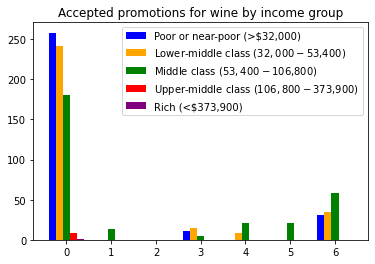

In [60]:
fig,ax = plt.subplots()
labels = ['Poor or near-poor (>$32,000)', 'Lower-middle class ($32,000-$53,400)', 'Middle class ($53,400-$106,800)','Upper-middle class ($106,800-$373,900)', 'Rich (<$373,900)']
colors = ['blue','orange','green','red','purple']
ax.hist(accepted_promo_by_income, bins=7 , range=[-0.5,6.5], histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 10})
ax.set_title("Accepted promotions for wine by income group")

Text(0.5, 1.0, 'Accepted promotions by enrolled year')

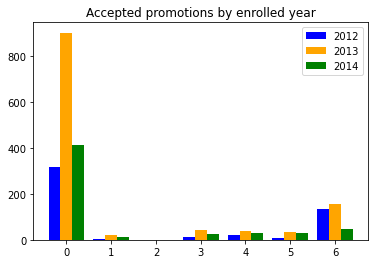

In [31]:
promo_2012 = pysqldf("SELECT * FROM marketing_data WHERE Enroll_Year = 2012")['CampaignAccepted'].values
promo_2013 = pysqldf("SELECT * FROM marketing_data WHERE Enroll_Year = 2013")['CampaignAccepted'].values
promo_2014 = pysqldf("SELECT * FROM marketing_data WHERE Enroll_Year = 2014")['CampaignAccepted'].values

promo_by_enroll_year = []
promo_by_enroll_year.append(list(promo_2012))
promo_by_enroll_year.append(list(promo_2013))
promo_by_enroll_year.append(list(promo_2014))

fig,ax = plt.subplots()
labels = ['2012', '2013', '2014']
colors = ['blue','orange','green']
ax.hist(promo_by_enroll_year, bins=7 , range=[-0.5,6.5], histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 10})
ax.set_title("Accepted promotions by enrolled year")

Conjecture: The longer the cusomters staty with the company, the higher chance they will accept the later promotion. 

Text(0.5, 1.0, 'Accepted promotions for sweets by number of kids in the household')

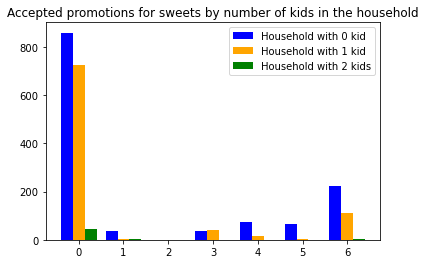

In [56]:
kid_home_0 = pysqldf("SELECT CampaignAccepted,MntSweetProducts FROM marketing_data WHERE Kidhome = 0")['CampaignAccepted'].values
kid_home_1 = pysqldf("SELECT CampaignAccepted,MntSweetProducts FROM marketing_data WHERE Kidhome = 1")['CampaignAccepted'].values
kid_home_2 = pysqldf("SELECT CampaignAccepted,MntSweetProducts FROM marketing_data WHERE Kidhome = 2")['CampaignAccepted'].values

promo_by_kidyear = []
promo_by_kidyear.append(list(kid_home_0))
promo_by_kidyear.append(list(kid_home_1))
promo_by_kidyear.append(list(kid_home_2))

fig,ax = plt.subplots()
labels = ['Household with 0 kid', 'Household with 1 kid', 'Household with 2 kids']
colors = ['blue','orange','green']
ax.hist(promo_by_kidyear, bins=7 , range=[-0.5,6.5], histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 10})
ax.set_title("Accepted promotions for sweets by number of kids in the household")

Correlation: 
-0.37067303115081424


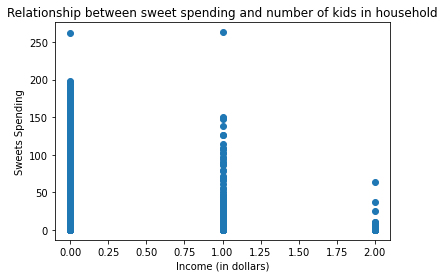

In [51]:
product = marketing_data['MntSweetProducts'].values
create_scatter_plot("Relationship between sweet spending and number of kids in household", "Sweets Spending", product, marketing_data['Kidhome'].values)
print("Correlation: ")
print(calculate_correlation(product,marketing_data['Kidhome'].values))

Text(0.5, 1.0, 'Accepted promotions for sweets by number of teens in the household')

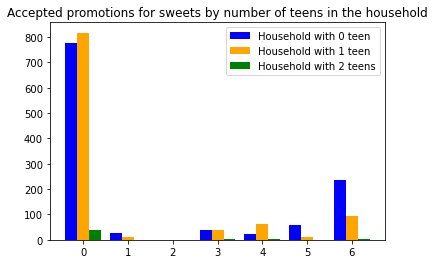

In [57]:
kid_home_0 = pysqldf("SELECT CampaignAccepted,MntSweetProducts FROM marketing_data WHERE Teenhome = 0")['CampaignAccepted'].values
kid_home_1 = pysqldf("SELECT CampaignAccepted,MntSweetProducts FROM marketing_data WHERE Teenhome = 1")['CampaignAccepted'].values
kid_home_2 = pysqldf("SELECT CampaignAccepted,MntSweetProducts FROM marketing_data WHERE Teenhome = 2")['CampaignAccepted'].values

promo_by_kidyear = []
promo_by_kidyear.append(list(kid_home_0))
promo_by_kidyear.append(list(kid_home_1))
promo_by_kidyear.append(list(kid_home_2))

fig,ax = plt.subplots()
labels = ['Household with 0 teen', 'Household with 1 teen', 'Household with 2 teens']
colors = ['blue','orange','green']
ax.hist(promo_by_kidyear, bins=7 , range=[-0.5,6.5], histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 10})
ax.set_title("Accepted promotions for sweets by number of teens in the household")

Correlation: 
-0.16247511144846694


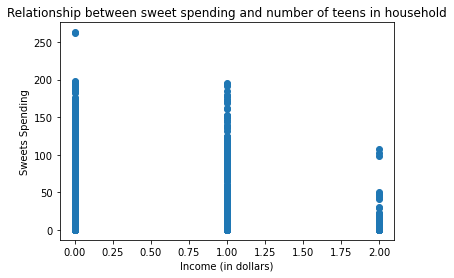

In [58]:
product = marketing_data['MntSweetProducts'].values
create_scatter_plot("Relationship between sweet spending and number of teens in household", "Sweets Spending", product, marketing_data['Teenhome'].values)
print("Correlation: ")
print(calculate_correlation(product,marketing_data['Teenhome'].values))

Conjecture: Household with one or less kid/teens tend to spend more on sweets. Probably because they are more wealthy and able to afford more of these treats than household with 2 kids/teens. Household with teens spend more sweets comepare to kids becasue teens tend to throw party and will purchase more of these treats

### Problem 3: The Model Development Part  (20 points)

**Insert your answers in the cell below** 

**Add as many cells as needed**

Use one of the conjectures as the basis to create a model so that other teams in the company can use your model for new unseen data.


In [4]:
# write here






### Problem 4: Presentation in the class (10 mins and 10 points)

* (5 points) Present your slides in the class. 
* (5 points) Participate in peer review process. 

Suggestion: You should practice so that your presentation does not exceed 10 minutes. All members of a group should share equal responsibility to present. 



# Report: communicate the results (20 points (or 25 points))

** minimum 8 pages **

(1) (5 points) What is your business proposition?

(2) (3 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data? What conjectures you made? Which conjecture you used as the basis of developing your model? Why?

(4) (3 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

(5) (4 points) How does the model tie in with the business proposition?

(5) (bonus 5 points) How did your team work together as a group from ideation to implementaion? Write in one page.

# Slides (for 10 minutes of presentation) (10 points)


1. (2 points) Motivation about the data collection, why the topic is interesting to you. 


2. (3 points) Conjectures you made. Reasons behind choosing a particular conjecture for the basis of developing a model.


2. (3 points) Communicating Results (figure/table)


4. (2 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)



# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "groupname.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PPT Slides**

* **Report**

Put the Jupyter Notebook file, the report (in PDF) and PPT slides (converted to PDF) in a folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be casestudy_3_groupname.zip. Upload the .zip file on Canvas.
        
**Note: Each team just needs to make one submission**
